In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
bfs = pd.read_csv(r"A:\DATA ANALYTICS\PYTHON\BLACK FRIDAY SALES PROJECT\archive\dataset.csv")

In [3]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Reading information about data

In [4]:
bfs.shape

#550068 rows, 12 cols

(550068, 12)

In [5]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# Set the option to display large numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

bfs.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068,550068,550068,550068,376430,166821,550068
mean,1003029,8,0,5,10,13,9264
std,1728,7,0,4,5,4,5023
min,1000001,0,0,1,2,3,12
25%,1001516,2,0,1,5,9,5823
50%,1003077,7,0,5,9,14,8047
75%,1004478,14,1,8,15,16,12054
max,1006040,20,1,20,18,18,23961


### Statistical Data of the dataset

In [7]:
bfs.duplicated().value_counts()

# no duplicates

False    550068
Name: count, dtype: int64

In [8]:
# to check cols
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
# Converting all the column names into lower case for easy usability.
bfs.rename(columns=str.lower,inplace=True) 

bfs.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

### Processing Each Column Individually

In [10]:
#user_id:It an unique customer id

bfs.user_id

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: user_id, Length: 550068, dtype: int64

In [11]:
# product_id
bfs.product_id

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: product_id, Length: 550068, dtype: object

In [12]:
# gender: Column contains gender information with ['M','F'] values.

bfs.gender.unique()

array(['F', 'M'], dtype=object)

In [13]:
# age col

bfs.age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

We have total 7 age category customers data.

'0-17', '18-25', '26-35', '36-45', '46-50', '51-55' and '55+'.



In [14]:
# occupation

bfs.occupation.unique(),len(bfs.occupation.unique()),bfs.occupation.dtype

(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6], dtype=int64),
 21,
 dtype('int64'))

We have 21 occupation types of customers.

In [15]:
# city col

bfs.city_category.unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
# Stay_In_Current_City_Years

bfs.stay_in_current_city_years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We have customer who are staying in city from '0', '1', '2', '3', '4+' years.

We can replace '4+' years to '4' so we can get excat number and we can assume that those customer are belonging to current city form 4 years are staying more than 4 years in the current city.

In [17]:
bfs.stay_in_current_city_years=bfs.stay_in_current_city_years.replace("4+",4).astype(int)
bfs.stay_in_current_city_years.unique()

array([2, 4, 3, 1, 0])

In [18]:
# maritial status

bfs.marital_status.unique()

array([0, 1], dtype=int64)

In [19]:
# product_category: Contains category wise product value.

bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200


p_c_1 has x type of products and 3 indicates no of products
p_c_2 has y type of products
p_c_3 has z type of products

In [20]:
# info about product_categories

bfs[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


p_c2 and p_c3 have null values we have to fill them 

In [21]:
bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200


x = bfs.groupby('occupation')['product_category_1'].agg(pd.Series.mode)
x

In [39]:
bfs.product_category_1.unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., 20., 19.])

In [40]:
a=bfs.groupby('age')['product_category_2'].agg(pd.Series.mode)
b=bfs.groupby('age')['product_category_3'].agg(pd.Series.mode)

c=bfs.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d=bfs.groupby('occupation')['product_category_3'].agg(pd.Series.mode)

#mode --->repeated values

In [41]:
a = bfs.groupby('age')['product_category_2'].value_counts().unstack(fill_value=0)
a

product_category_2,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
age,,,,,,,,,,,,,,,,,
0-17,1516,125,4695,1036,367,10,2596,156,51,380,164,247,1350,956,1134,279,40
18-25,12105,645,6440,5328,3099,106,38515,1100,394,2890,827,1608,9623,6726,8157,1761,336
26-35,29284,1192,9354,10556,6882,262,85848,2420,1109,5924,2014,3831,22152,15289,17786,4808,876
36-45,14540,511,5009,5137,3157,137,41608,1141,682,2717,1205,2198,11832,8038,8471,3002,628
46-50,5753,189,1829,1923,1268,53,17932,408,308,1090,570,1042,5172,3165,3259,1442,298
51-55,4329,136,1315,1540,1063,38,15896,334,305,778,454,956,4304,2569,2888,1227,369
55+,2179,86,724,715,630,20,9317,134,194,355,294,649,2511,1112,1560,801,223


In [42]:
a,b,c,d

(product_category_2     2     3     4      5     6    7      8     9     10  \
 age                                                                          
 0-17                 1516   125  4695   1036   367   10   2596   156    51   
 18-25               12105   645  6440   5328  3099  106  38515  1100   394   
 26-35               29284  1192  9354  10556  6882  262  85848  2420  1109   
 36-45               14540   511  5009   5137  3157  137  41608  1141   682   
 46-50                5753   189  1829   1923  1268   53  17932   408   308   
 51-55                4329   136  1315   1540  1063   38  15896   334   305   
 55+                  2179    86   724    715   630   20   9317   134   194   
 
 product_category_2    11    12    13     14     15     16    17   18  
 age                                                                   
 0-17                 380   164   247   1350    956   1134   279   40  
 18-25               2890   827  1608   9623   6726   8157  1761  336  

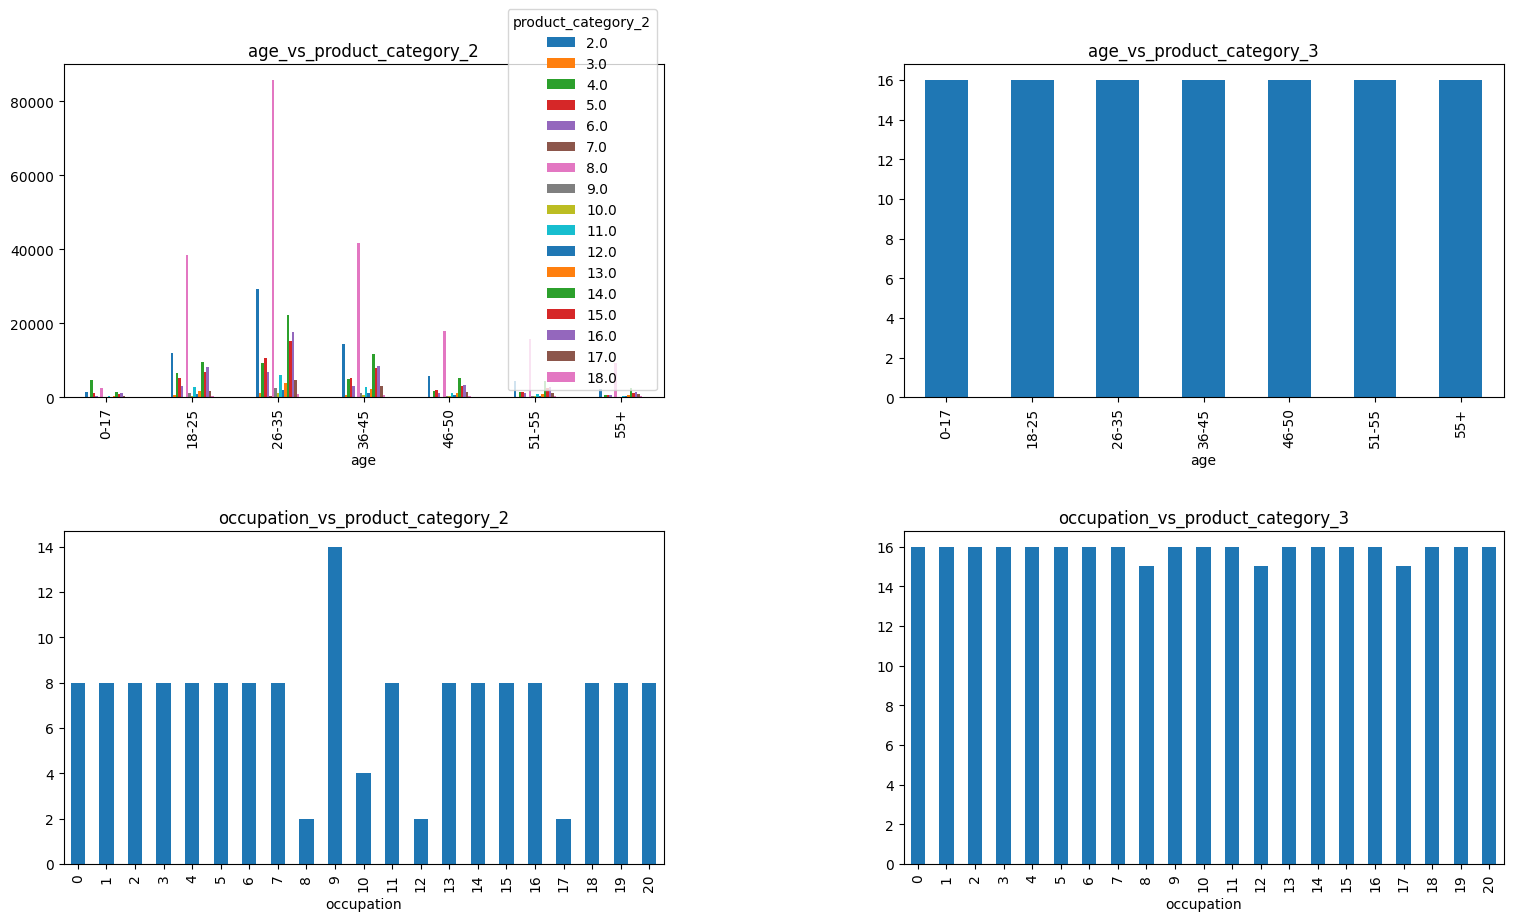

In [61]:
import matplotlib.pyplot as plt

# Create a figure with a specific size
fig = plt.figure(figsize=(18, 10))

# Adjust the spacing between subplots
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Add subplots to the figure
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Plot data on each subplot
a.plot(kind='bar', title="age_vs_product_category_2", ax=ax1)
b.plot(kind='bar', title="age_vs_product_category_3", ax=ax2)
c.plot(kind='bar', title="occupation_vs_product_category_2", ax=ax3)
d.plot(kind='bar', title="occupation_vs_product_category_3", ax=ax4)

# Display the plot
plt.show()


In [44]:
def fill_nan_category(category_column) :
    x= bfs.groupby('occupation')[category_column].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        bfs.loc[bfs['occupation']==i,category_column]=bfs.loc[bfs['occupation']==i,category_column].fillna(j)

In [45]:
fill_nan_category('product_category_1')
fill_nan_category('product_category_2')
fill_nan_category('product_category_3')
bfs.product_category_1=bfs.product_category_1.astype(float)

In [46]:
bfs[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  float64
 1   product_category_2  550068 non-null  float64
 2   product_category_3  550068 non-null  float64
dtypes: float64(3)
memory usage: 12.6 MB


In [47]:
p=bfs.product_category_2.isnull().sum()

q=bfs.product_category_3.isnull().sum()
p,q

(0, 0)

In [48]:
# purchase:
bfs.purchase.unique(),bfs.purchase.isnull().count()

(array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64), 550068)

In [49]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  int32  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  float64
 9   product_category_2          550068 non-null  float64
 10  product_category_3          550068 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 48.3+ MB


In [50]:
bfs.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,4,16,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,4,16,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,16,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,8,16,7969


In [51]:
bfs.to_csv('./bfs_clean_data.csv')

#we cleaned our data successfully without losing single value, we got total 550068 values.

#### Data Visualization

In [62]:
bfs.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,4,16,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,4,16,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,16,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,8,16,7969


#### 1) Check Distribution and Outliers of 'purchase'

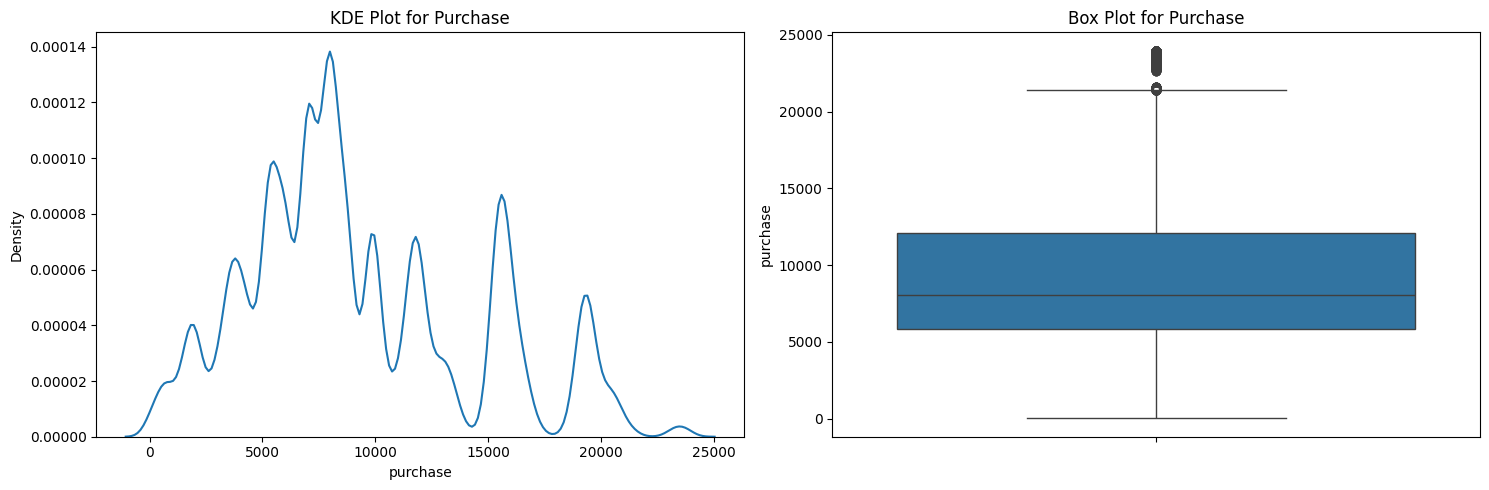

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(121)  # Subplot 1: KDE plot
sns.kdeplot(data=bfs['purchase'])
plt.title('KDE Plot for Purchase')

plt.subplot(122)  # Subplot 2: Box plot
sns.boxplot(data=bfs['purchase'])
plt.title('Box Plot for Purchase')

plt.tight_layout()  # Automatically adjust subplot parameters for better layout
plt.show()

We observed that most of the purcahse value is between 5000 to 10000.

#### 2) Find which kind of customer visits more frequently ? Male or Female?{'M','F'}.

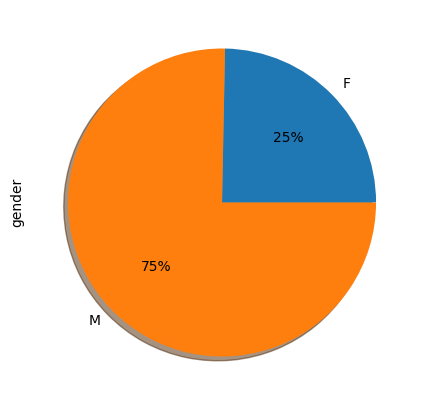

In [70]:
bfs.groupby('gender').agg({'gender':'count'}).gender.plot(kind='pie',autopct='%0.0f%%',figsize=(5,5),shadow=True)
plt.show()

We see that 75% Male customers visits us frequently.

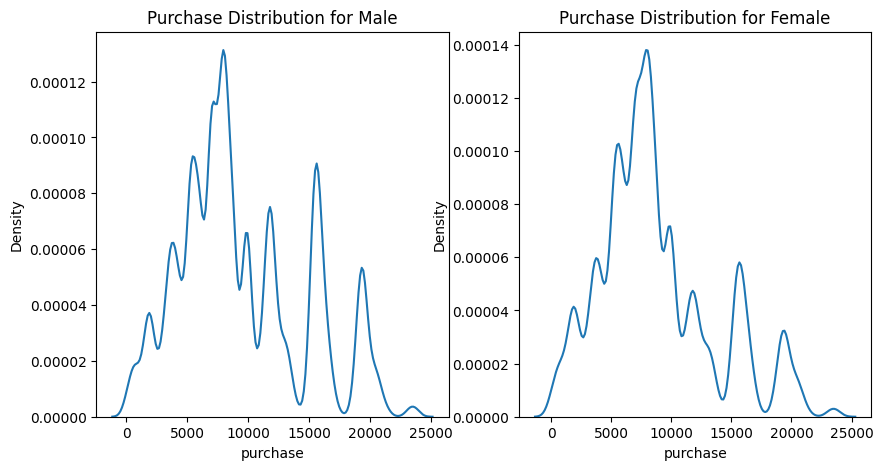

In [79]:
# Create the figure and subplots
plt.figure(figsize=(10, 5))

# KDE Plot for 'Male'
plt.subplot(121)
sns.kdeplot(data=bfs[bfs['gender'] == 'M']['purchase'])
plt.title('Purchase Distribution for Male')

# KDE Plot for 'Female'
plt.subplot(122)
sns.kdeplot(data=bfs[bfs['gender'] == 'F']['purchase'])
plt.title('Purchase Distribution for Female')

# Show the plots
plt.show()


#### 4) Find which kind of customer purchasing more ? Male or Female?{'M','F'}

,gender,purchase
0,F,1186232642
1,M,3909580100


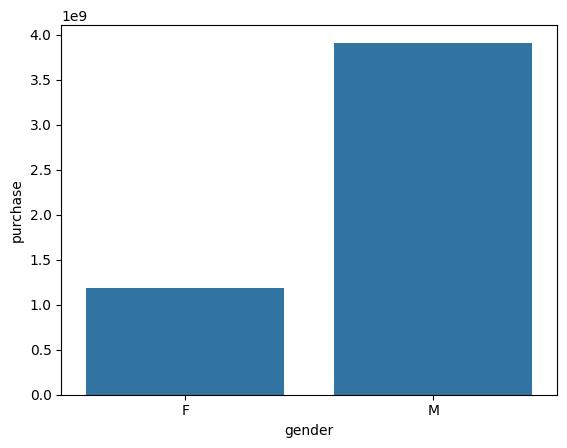

In [81]:
p=bfs.groupby('gender').agg({'purchase':sum}).reset_index()
sns.barplot(x='gender',y='purchase',data=p)
p

Total purchases by Male customers: 3909580100
Total purchases by Female customers: 1186232642


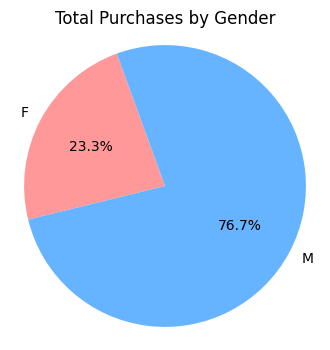

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data creation for demonstration (remove this part if using actual bfs DataFrame)
# bfs = pd.DataFrame({
#     'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
#     'purchase': [200, 150, 300, 350, 250, 450, 400, 300]
# })

# Calculate the total purchases for each gender
total_purchases = bfs.groupby('gender')['purchase'].sum()

# Print the total purchases for each gender (optional)
print("Total purchases by Male customers:", total_purchases['M'])
print("Total purchases by Female customers:", total_purchases['F'])

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(total_purchases, labels=['F', 'M'], autopct='%1.1f%%', startangle=110, colors=['#ff9999','#66b3ff'])
plt.title('Total Purchases by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


We observe 'Male' customers are purchasing more.

#### 5) Find which Product customer buying most by seeing product_id.

Top 5 most bought products:
product_id
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: count, dtype: int64


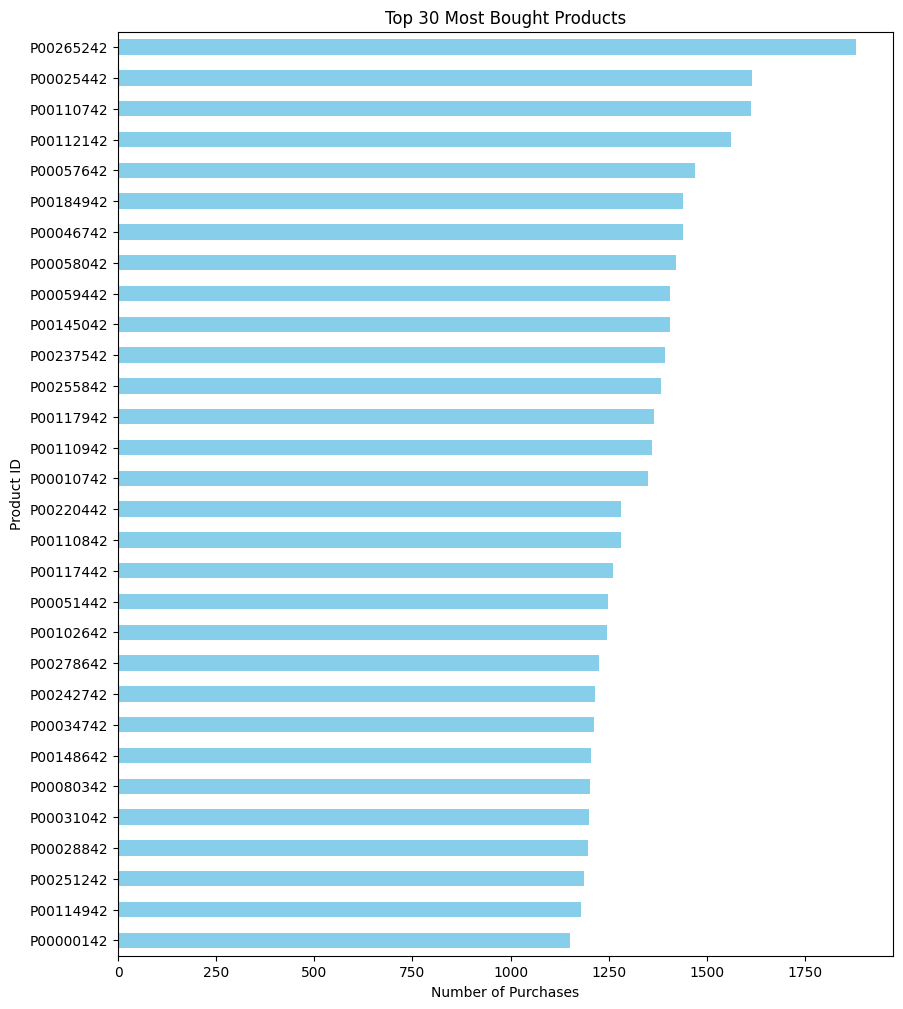

In [95]:
top_5_products = bfs['product_id'].value_counts().head(5)

# Find the top 30 most bought products
top_30_products = bfs['product_id'].value_counts().head(30)

# Print the top 30 most bought products (optional)
print("Top 5 most bought products:")
print(top_5_products)

# Visualize with a horizontal bar chart
plt.figure(figsize=(10, 12))
top_30_products.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Purchases')
plt.ylabel('Product ID')
plt.title('Top 30 Most Bought Products')
plt.gca().invert_yaxis()  # To display the highest values at the top

# Show the plot
plt.show()


Here are the top 30 product_id's customers buying more.

#### Find which customer visits more frequently ? UnMarried or Married? {'UnMarried': 0, 'Married': 1}

Visit counts:
marital_status
0    324731
1    225337
Name: count, dtype: int64


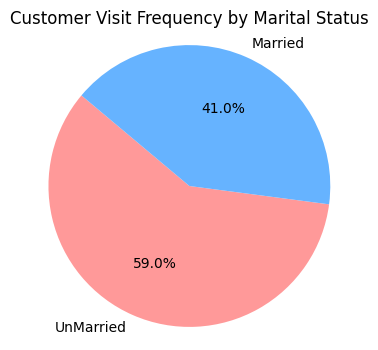

In [99]:
# Group by marital status and count visits
visit_counts = bfs['marital_status'].value_counts()

# Print the visit counts for each marital status (optional)
print("Visit counts:")
print(visit_counts)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(visit_counts, labels=['UnMarried', 'Married'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Customer Visit Frequency by Marital Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

#### Find which customer purchasing more (Married or UnMarried) and Top 10 products purcahsed by them

,gender,marital_status,purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


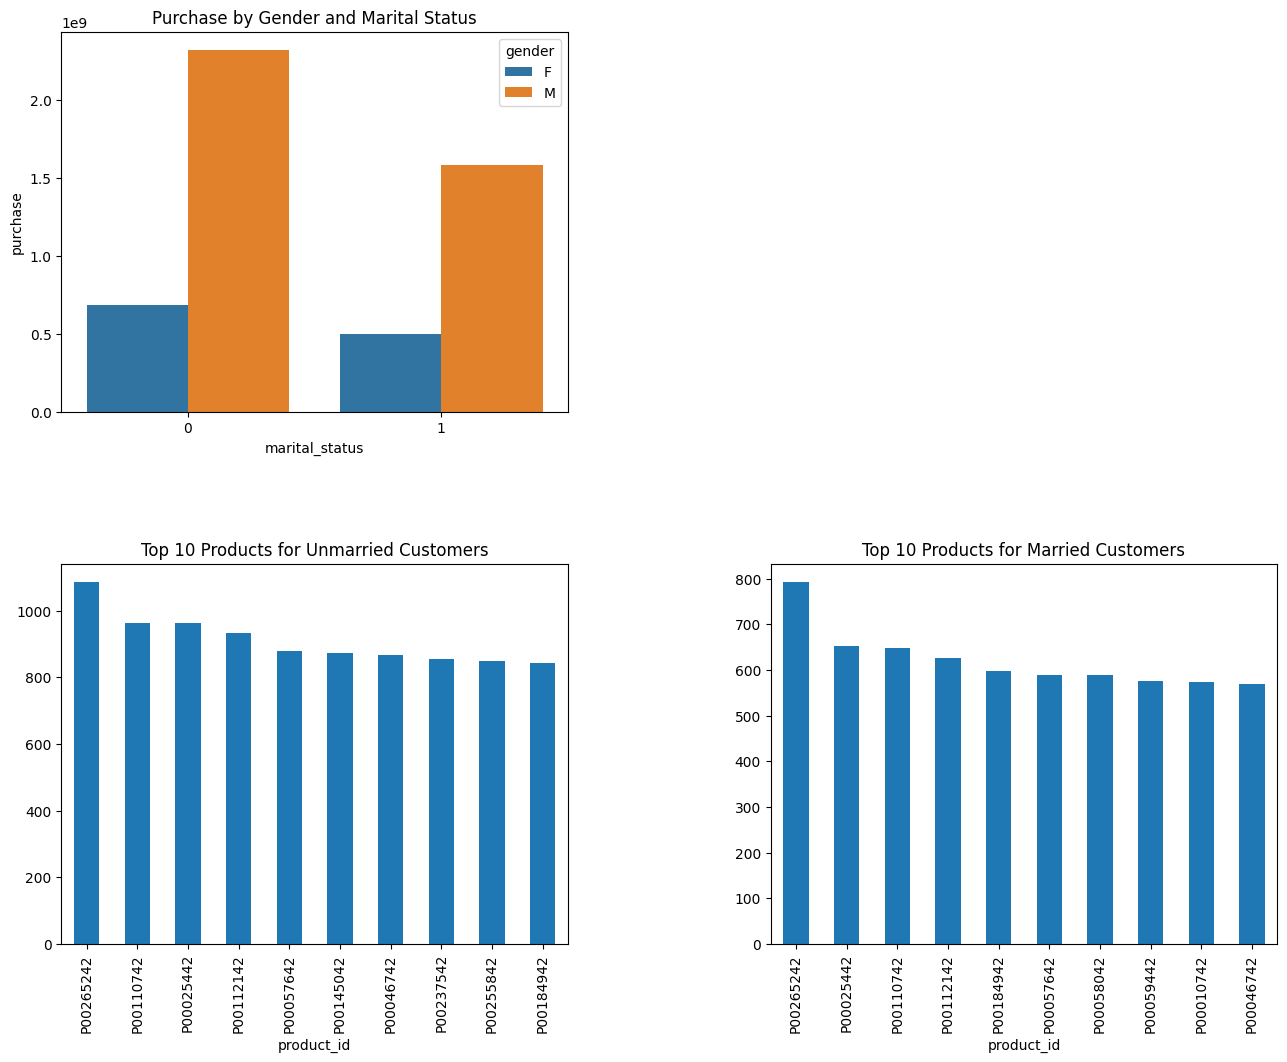

In [100]:
# Group and aggregate purchase by gender and marital status
M_UM_P = bfs.groupby(['gender', 'marital_status']).agg({'purchase': sum}).reset_index()

# Filter data for unmarried and married individuals and get the top 10 product counts
UM = bfs[bfs['marital_status'] == 0]['product_id'].value_counts().nlargest(10)
M = bfs[bfs['marital_status'] == 1]['product_id'].value_counts().nlargest(10)

# Create subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=2, top=2, wspace=0.4, hspace=0.4)

# Subplot 1: Bar plot for purchase by gender and marital status
plt.subplot(2, 2, 1)
sns.barplot(x='marital_status', y='purchase', hue='gender', data=M_UM_P)
plt.title('Purchase by Gender and Marital Status')

# Subplot 2: Bar plot for top 10 products for unmarried customers
plt.subplot(2, 2, 3)
UM.plot(kind='bar')
plt.title('Top 10 Products for Unmarried Customers')

# Subplot 3: Bar plot for top 10 products for married customers
plt.subplot(2, 2, 4)
M.plot(kind='bar')
plt.title('Top 10 Products for Married Customers')
M_UM_P

In the above plot we can see that 'UnMarried' customers purchasing more than the 'Married' customers.

And BarPlot showing that top 10 Product Id's purshased by them frequently.

#### Number of Purchases by City Category

Purchase counts by city category:
city_category
B    231173
C    171175
A    147720
Name: count, dtype: int64


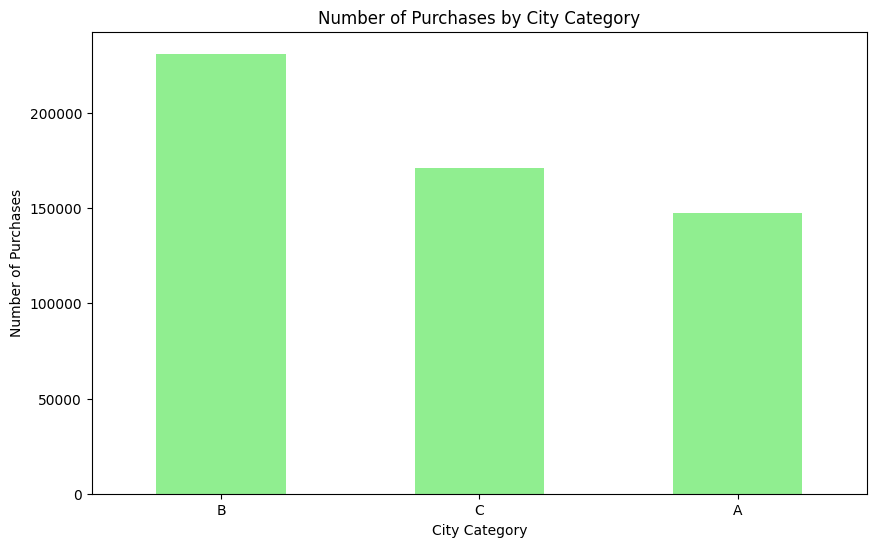

In [103]:
# Count the purchases for each city category
city_purchase_counts = bfs['city_category'].value_counts()

# Print the purchase counts for each city category (optional)
print("Purchase counts by city category:")
print(city_purchase_counts)

# Create a bar plot
plt.figure(figsize=(10, 6))
city_purchase_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('City Category')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by City Category')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Show the plot
plt.show()


#### Top 10 Users Who Buy the Most Products

Top 10 users who buy the most products:
user_id
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: count, dtype: int64


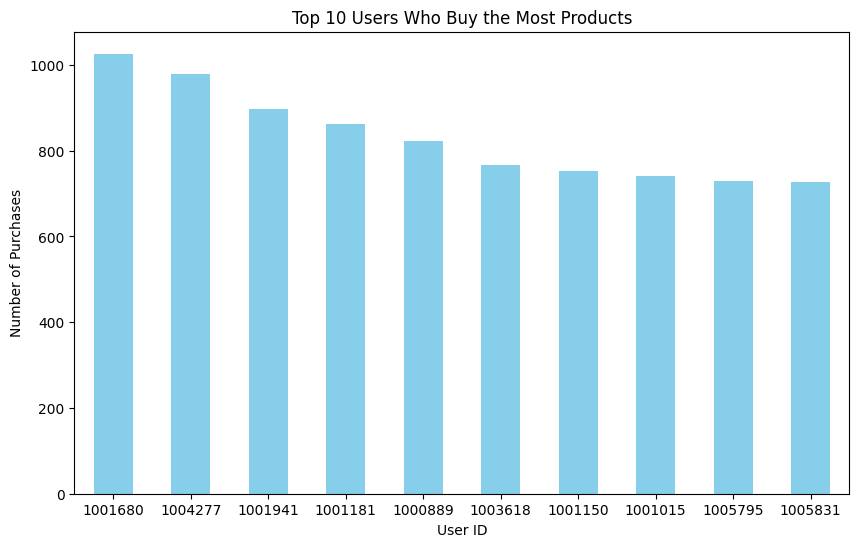

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation for demonstration (remove this part if using actual bfs DataFrame)
# bfs = pd.DataFrame({
#     'user_id': [1, 2, 1, 3, 2, 1, 4, 2, 1, 3, 3, 1, 4, 4, 4, 5, 5, 5, 5, 5],
#     'product_id': [101, 102, 101, 103, 102, 101, 104, 102, 102, 103, 103, 101, 104, 104, 104, 105, 105, 105, 105, 105]
# })

# Count the number of purchases for each user
top_users = bfs['user_id'].value_counts().head(10)

# Print the top 10 users (optional)
print("Top 10 users who buy the most products:")
print(top_users)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Users Who Buy the Most Products')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Show the plot
plt.show()


#### Products Most Bought by Top 10 Users

Top products bought by the top 10 users:
product_id
P00194642    9
P00117942    9
P00034842    9
P00178242    9
P00128142    8
P00035942    8
P00111842    8
P00344442    8
P00121342    8
P00110842    8
Name: count, dtype: int64


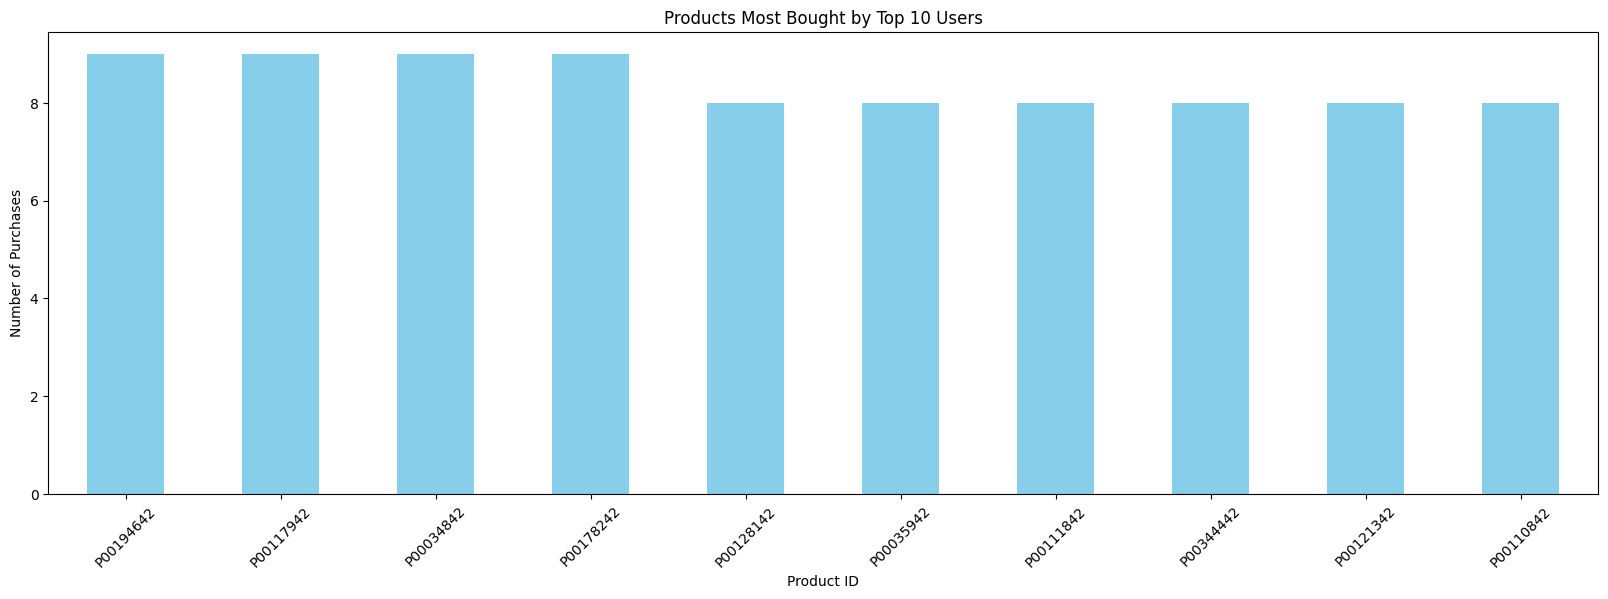

In [112]:
# Count the number of purchases for each user and get the top 10 users
top_users = bfs['user_id'].value_counts().head(10).index

# Filter the DataFrame to include only purchases made by the top 10 users
top_users_purchases = bfs[bfs['user_id'].isin(top_users)]

# Count the number of purchases for each product by these top 10 users
top_products_by_top_users = top_users_purchases['product_id'].value_counts().head(10)

# Print the top products bought by the top 5 users (optional)
print("Top products bought by the top 10 users:")
print(top_products_by_top_users)

# Create a bar plot
plt.figure(figsize=(20, 6))
top_products_by_top_users.plot(kind='bar', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.title('Products Most Bought by Top 10 Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()
